<a href="https://colab.research.google.com/github/RemyLpr/TP_PAUWELS/blob/main/TP1_Remy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Université Paul Sabatier, M2 SID
# Machine learning - TP1

En tête pour charger les fonctions nécessaires au TP. La fonction <code>generateData</code> vous permet de générer autant d'échantillon que vous voulez du processus suivant:
- $X$ est uniforme sur $[-1,1]$
- $Y = \sin(5X) + \epsilon$ où $\epsilon$ est une gaussienne de moyenne $0$ et de variance $1/10$.

On commence avec un échantillon d'entrainement fixé.

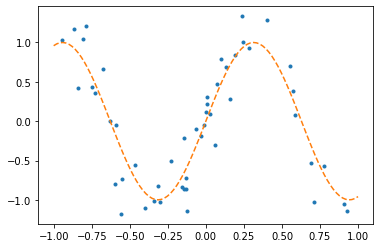

In [ ]:
%matplotlib inline
from matplotlib import pyplot
import math
import numpy as np
import scipy.misc
import numpy.random as npr
import sklearn as sk
from sklearn import neighbors

def generateData(n,seed=1):
    npr.seed(seed)
    x = npr.rand(n)*2 - 1
    y = np.sin(x*5) + npr.normal(size=n) / np.sqrt(10)
    return(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))

(xn,yn) = generateData(50,2)
xSeq = np.array(np.linspace(-1,1,100)).reshape(-1,1)
pyplot.plot(xn,yn,'.')
pyplot.plot(xSeq,np.sin(xSeq * 5),'--')

## Question 2: implémenter l'estimateur $k$-NN.

L'échantillon d'entrainement est fixé. Dessiner l'estimateur de régression $k$-NN pour $k = 1,5,15$. Regarder la documentation de <code>scikit-learn</code>.

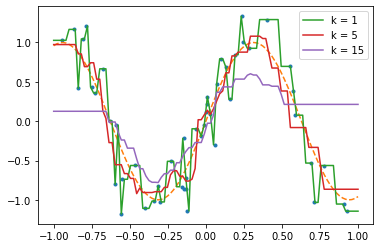

In [ ]:
pyplot.plot(xn,yn,'.')
pyplot.plot(xSeq,np.sin(xSeq * 5),'--')
 

for n in (1, 5, 15):
    neigh = neighbors.KNeighborsRegressor(n_neighbors=n)
    neigh.fit(xn, yn)
    
    pyplot.plot(xSeq, neigh.predict(xSeq), label = "k = " +str(n))
pyplot.legend()

## Question 2: risque de l'estimateur knn pour un échantillon fixé.

L'échantillon d'entrainement est fixé. Pour chaque valeur de $k$, vous avez une fonction de décision $f_k$ donnée par l'estimateur $k$-NN.  Estimer et dessiner le risque de $f_k$, en fonction de $k$ variant entre 1 et 10. Vous pouvez générer autant d'échantillon que vous voulez. Pour rappel, pour une fonction de décision $f$ donnée, son risque est donnée par:
$$\mathbb{E}_{X,Y}\left[(f(X)-Y)^2 \right]$$
 Quel est la valeur de $k$ assurant le risque le plus faible? 

**La valeur de k assurant le risque le plus faible est 5** 

In [ ]:
def risque(predict, Y):
    result = 0
    for i in range(len(predict)):
        result += (predict[i] - Y[i])**2
    result = result / len(predict)
    return result


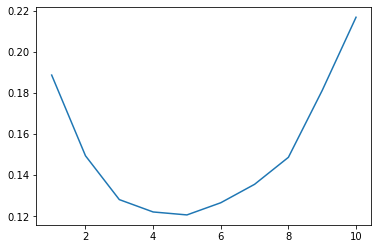

In [ ]:
risque_result = []
x_risque_result = []

(x_risque,y_risque) = generateData(10000,2)


for n in range(1, 10+1):
    neigh = neighbors.KNeighborsRegressor(n_neighbors=n)
    neigh.fit(xn, yn)
    predict = neigh.predict(x_risque)
    
    risque_result.append(risque(predict, y_risque))
    x_risque_result.append(n)
    
pyplot.plot(x_risque_result, risque_result)


## Question 3: décomposition biais variance.

Vous savez que $\mathbb{E}[Y|X=x] = \sin(5x)$ et que l'erreur de Bayes est de $1/10$ (pourquoi?).  
La taille de l'échantillon d'entrainement est fixée à 50, vous pouvez générer autant d'échantillon que vous voulez. Estimer et dessiner la décomposition biais variance de l'erreur de prediction de l'estimateur $k$-NN en $x = 0.5$ en fonction de $k$ variant entre 1 et 20. 
Pour rappel, pour un estimateur $\hat{f}_n$ dépendant d'un échantillon $\left\{(X_i, Y_i)\right\}_{i=1}^n$, le biais et la variance sont donnés respectivement par:
$$\mathbb{E}_n\left[f^*(0.5) - \hat{f}_n(0.5) \right]^2 \qquad\qquad \text{Var}_n\left[ \hat{f}_n(0.5)\right]  $$
où $f^*$ désigne la règle de Bayes et $\mathbb{E}_n$ et $\text{Var}_n$ désignent l'espérance et la variance pour le tirage de l'échantillon.
Quelle est la valeur de $k$ assurant le risque le plus faible? 

**L'esperence de Y sachant X se raproche de la fonction que l'on cherche à estimer (ici sin(5x))<br>
L'erreur de Bayes correspond ici à la variance de l'erreur gaussienne des données (ici 1/10)**

In [ ]:
seed_i = 0

In [ ]:
def biais_var(nb_echantillon, k, x = 0.5, n = 50):
    result_biais = 0
    result_moyenne = 0
    result_moyenne_carre = 0
    
    for i in range(nb_echantillon):
        (xn,yn) = generateData(n,i + seed_i + 1)
        
        neigh = neighbors.KNeighborsRegressor(n_neighbors=k)
        neigh.fit(xn, yn)
        predict = neigh.predict([[x]])[0][0]
        
        result_moyenne += predict
        result_moyenne_carre += predict**2
        
        result_biais += (math.sin(5*x) - predict)
        
        
    result_biais = (result_biais / nb_echantillon)**2
    
    result_moyenne = result_moyenne  / nb_echantillon
    result_moyenne_carre = result_moyenne_carre / nb_echantillon
    result_var = result_moyenne_carre - result_moyenne **2
    
    return result_biais, result_var

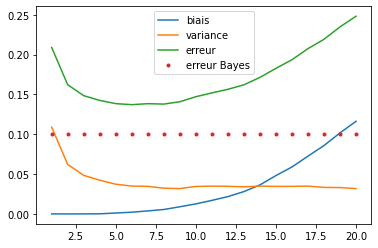

In [ ]:
nb_echantillon = 500
x_graph = []
biais_graph = []
variance_graph = []


for k in range(1,20+1):
    (biais,var) = biais_var(nb_echantillon, k)
    x_graph.append(k)
    biais_graph.append(biais)
    variance_graph.append(var)
    

pyplot.plot(x_graph, biais_graph, label = "biais")
pyplot.plot(x_graph, variance_graph, label = "variance")

erreur_graph = [biais_graph[i] + variance_graph[i] +1/10 for i in range(len(biais_graph))]

pyplot.plot(x_graph, erreur_graph, label = "erreur")
pyplot.plot(x_graph, [1/10 for i in range(len(biais_graph))],'.', label = "erreur Bayes")


pyplot.legend()

## Question 4: mêmes questions pour la régression polynomiale.
Répondez aux questions précédentes en remplaçant la régression $k$-NN par une régression polynomiale de degré $d$ variant de $1$ à $10$. Si vous avez des problèmes numériques vous pourrez utiliser les polynomes de Chebychev. Si vous avez fini, vous pourrez mettre en oeuvre les mêmes expériences avec un régression polynomiale de degré 10 et une régularisation (somme des carrés des coefficients, variation totale sur [-1,1]).

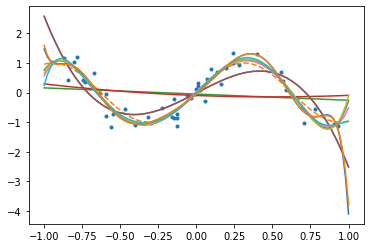

In [ ]:
pyplot.plot(xn,yn,'.')
pyplot.plot(xSeq,np.sin(xSeq * 5),'--')
xSeq = np.array(np.linspace(-1,1,100)).reshape(-1,1)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

for n in range(1, 10+1):
  polynomial_features= PolynomialFeatures(degree=n)
  x_poly = polynomial_features.fit_transform(xn)
  model = LinearRegression()
  model.fit(x_poly, yn)
  xSeq_poly = polynomial_features.fit_transform(xSeq)
  pyplot.plot(xSeq, model.predict(xSeq_poly), label = "k = " +str(n))



[array([0.60591989]), array([0.60670981]), array([0.27298283]), array([0.27298674]), array([0.1147744]), array([0.1176093]), array([0.1230533]), array([0.11951579]), array([0.21015409]), array([0.19477682])]


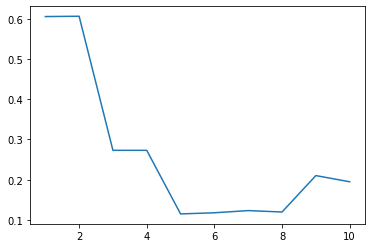

In [ ]:
risque_result = []
x_risque_result = []

(x_risque,y_risque) = generateData(10000,2)


for n in range(1, 10+1):
    polynomial_features= PolynomialFeatures(degree=n)
    x_poly = polynomial_features.fit_transform(xn)
    model = LinearRegression()
    model.fit(x_poly, yn)

    x_risque_poly = polynomial_features.fit_transform(x_risque)
    predict = model.predict(x_risque_poly)
    risque_result.append(risque(predict, y_risque))
    x_risque_result.append(n)
    
pyplot.plot(x_risque_result, risque_result)

In [ ]:
def biais_var(nb_echantillon, k, x = 0.5, n = 50):
    result_biais = 0
    result_moyenne = 0
    result_moyenne_carre = 0
    
    for i in range(nb_echantillon):

        (xn,yn) = generateData(n,i + seed_i + 1)
        polynomial_features= PolynomialFeatures(degree=k)
        x_poly = polynomial_features.fit_transform(xn)
        model = LinearRegression()
        model.fit(x_poly, yn)

        x_ = polynomial_features.fit_transform([[x]])

        predict = model.predict(x_)[0][0]
        
        result_moyenne += predict
        result_moyenne_carre += predict**2
        
        result_biais += (math.sin(5*x) - predict)
        
        
    result_biais = (result_biais / nb_echantillon)**2
    
    result_moyenne = result_moyenne  / nb_echantillon
    result_moyenne_carre = result_moyenne_carre / nb_echantillon
    result_var = result_moyenne_carre - result_moyenne **2
    
    return result_biais, result_var

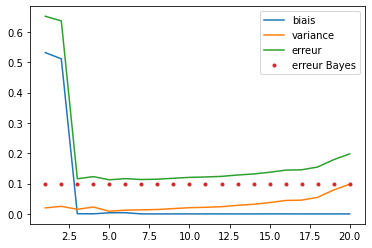

In [ ]:
nb_echantillon = 500
x_graph = []
biais_graph = []
variance_graph = []


for k in range(1,20+1):
    (biais,var) = biais_var(nb_echantillon, k)
    x_graph.append(k)
    biais_graph.append(biais)
    variance_graph.append(var)
    

pyplot.plot(x_graph, biais_graph, label = "biais")
pyplot.plot(x_graph, variance_graph, label = "variance")

erreur_graph = [biais_graph[i] + variance_graph[i] +1/10 for i in range(len(biais_graph))]

pyplot.plot(x_graph, erreur_graph, label = "erreur")
pyplot.plot(x_graph, [1/10 for i in range(len(biais_graph))],'.', label = "erreur Bayes")


pyplot.legend()